# Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.cluster import KMeans
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import folium

import warnings
warnings.filterwarnings('ignore')

# Read Data

In [ ]:
data_2020 = pd.read_csv('data_2020.csv')
data_2023 = pd.read_csv('data_2023.csv')
data_2024 = pd.read_csv('data_2024.csv')

# Data Cleaning and Preparation

## Checking Data

### 2020

In [ ]:
data_2020

,no,kecamatan,tahun,pengurangan_sampah,penanganan_sampah,jumlah_armada_truk,jumlah_penduduk,jumlah_kk,jumlah_laki,jumlah_perempuan
0,1,TANGERANG,2020,7283,49574,13,153859,49274,77202,76657
1,2,JATIUWUNG,2020,4464,30386,11,102053,42837,52345,49708
2,3,BATUCEPER,2020,4034,27459,12,92044,28272,47033,45011
3,4,BENDA,2020,4101,27912,10,83526,29061,42683,40843
4,5,CIPONDOH,2020,13119,89294,16,248212,70820,125457,122755
5,6,CILEDUG,2020,8130,55334,13,164151,48701,82869,81282
6,7,KARAWACI,2020,6974,47468,21,184388,61910,93108,91280
7,8,PERIUK,2020,5874,39978,10,141003,41520,71761,69242
8,9,CIBODAS,2020,6027,41026,11,147279,81708,73853,73426
9,10,NEGLASARI,2020,4649,31646,12,115520,42499,59047,56473


In [ ]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   no                  13 non-null     int64 
 1   kecamatan           13 non-null     object
 2   tahun               13 non-null     int64 
 3   pengurangan_sampah  13 non-null     int64 
 4   penanganan_sampah   13 non-null     int64 
 5   jumlah_armada_truk  13 non-null     int64 
 6   jumlah_penduduk     13 non-null     int64 
 7   jumlah_kk           13 non-null     int64 
 8   jumlah_laki         13 non-null     int64 
 9   jumlah_perempuan    13 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 1.1+ KB


### 2023

In [ ]:
data_2023

,no,kecamatan,tahun,pengurangan_sampah,penanganan_sampah,jumlah_armada_truk,jumlah_penduduk,jumlah_kk,jumlah_laki,jumlah_perempuan
0,1,TANGERANG,2023,10785,41761,13,165575,53755,83081,82494
1,2,JATIUWUNG,2023,6611,27699,11,107510,35525,55144,52366
2,3,BATUCEPER,2023,5973,24983,12,95474,30806,48785,46689
3,4,BENDA,2023,6072,22671,10,85769,27043,43829,41940
4,5,CIPONDOH,2023,19425,67370,16,231127,72973,116822,114305
5,6,CILEDUG,2023,12038,44554,13,150190,48009,75821,74369
6,7,KARAWACI,2023,10327,50047,21,193480,63883,97699,95781
7,8,PERIUK,2023,8697,38271,10,144640,46407,73612,71028
8,9,CIBODAS,2023,8925,39975,11,158036,51829,79247,78789
9,10,NEGLASARI,2023,6884,31355,12,124907,40008,63845,61062


In [ ]:
data_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   no                  13 non-null     int64 
 1   kecamatan           13 non-null     object
 2   tahun               13 non-null     int64 
 3   pengurangan_sampah  13 non-null     int64 
 4   penanganan_sampah   13 non-null     int64 
 5   jumlah_armada_truk  13 non-null     int64 
 6   jumlah_penduduk     13 non-null     int64 
 7   jumlah_kk           13 non-null     int64 
 8   jumlah_laki         13 non-null     int64 
 9   jumlah_perempuan    13 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 1.1+ KB


### 2024

In [ ]:
data_2024

,no,kecamatan,tahun,pengurangan_sampah,penanganan_sampah,bank_sampah,tps3r,jumlah_bank_sampah,jumlah_tps3r,jumlah_penduduk,jumlah_kk,jumlah_armada_truk,jumlah_laki,jumlah_perempuan
0,1,TANGERANG,2024,25661,29217,25661,0,4,0,165575,49274,13,83081,82494
1,2,JATIUWUNG,2024,1956,18985,1831,125,1,1,107510,42837,11,55144,52366
2,3,BATU CEPER,2024,3153,16859,3153,0,1,0,95474,28272,12,48785,46689
3,4,BENDA,2024,107,15147,107,0,2,0,85769,29061,10,43829,41940
4,5,CIPONDOH,2024,10992,40808,10838,154,5,3,231127,70820,16,116822,114305
5,6,CILEDUG,2024,52917,26471,52917,0,6,0,150190,48701,13,75821,74369
6,7,KARAWACI,2024,11285,34159,11041,243,6,3,193480,61910,21,97699,95781
7,8,PERIUK,2024,18427,25526,18367,60,4,1,144640,41520,10,73612,71028
8,9,CIBODAS,2024,3564,27907,3564,0,2,0,158036,81708,11,79247,78789
9,10,NEGLASARI,2024,2103,22056,2018,85,1,1,124907,42499,12,63845,61062


In [ ]:
data_2024 = data_2024.drop(["tps3r", "jumlah_tps3r", "jumlah_bank_sampah", "bank_sampah"], axis=1)

column_order = ["no", "kecamatan", "tahun", "pengurangan_sampah", "penanganan_sampah",
                "jumlah_armada_truk", "jumlah_penduduk", "jumlah_kk", "jumlah_laki", "jumlah_perempuan"]

data_2024 = data_2024[column_order]
data_2024

,no,kecamatan,tahun,pengurangan_sampah,penanganan_sampah,jumlah_armada_truk,jumlah_penduduk,jumlah_kk,jumlah_laki,jumlah_perempuan
0,1,TANGERANG,2024,25661,29217,13,165575,49274,83081,82494
1,2,JATIUWUNG,2024,1956,18985,11,107510,42837,55144,52366
2,3,BATU CEPER,2024,3153,16859,12,95474,28272,48785,46689
3,4,BENDA,2024,107,15147,10,85769,29061,43829,41940
4,5,CIPONDOH,2024,10992,40808,16,231127,70820,116822,114305
5,6,CILEDUG,2024,52917,26471,13,150190,48701,75821,74369
6,7,KARAWACI,2024,11285,34159,21,193480,61910,97699,95781
7,8,PERIUK,2024,18427,25526,10,144640,41520,73612,71028
8,9,CIBODAS,2024,3564,27907,11,158036,81708,79247,78789
9,10,NEGLASARI,2024,2103,22056,12,124907,42499,63845,61062


In [ ]:
data_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   no                  13 non-null     int64 
 1   kecamatan           13 non-null     object
 2   tahun               13 non-null     int64 
 3   pengurangan_sampah  13 non-null     int64 
 4   penanganan_sampah   13 non-null     int64 
 5   jumlah_armada_truk  13 non-null     int64 
 6   jumlah_penduduk     13 non-null     int64 
 7   jumlah_kk           13 non-null     int64 
 8   jumlah_laki         13 non-null     int64 
 9   jumlah_perempuan    13 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 1.1+ KB


## Data Cleaning

### Identifying and Handling Missing Values

In [ ]:
#data = pd.concat([data_2020, data_2023, data_2024], ignore_index=True)

data = data_2024

print("Nilai hilang di setiap kolom:")
print(data.isnull().sum())

numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

print("\nSetelah mengisi nilai hilang:")
print(data.isnull().sum())

Nilai hilang di setiap kolom:
no                    0
kecamatan             0
tahun                 0
pengurangan_sampah    0
penanganan_sampah     0
jumlah_armada_truk    0
jumlah_penduduk       0
jumlah_kk             0
jumlah_laki           0
jumlah_perempuan      0
dtype: int64

Setelah mengisi nilai hilang:
no                    0
kecamatan             0
tahun                 0
pengurangan_sampah    0
penanganan_sampah     0
jumlah_armada_truk    0
jumlah_penduduk       0
jumlah_kk             0
jumlah_laki           0
jumlah_perempuan      0
dtype: int64


In [ ]:
data

,no,kecamatan,tahun,pengurangan_sampah,penanganan_sampah,jumlah_armada_truk,jumlah_penduduk,jumlah_kk,jumlah_laki,jumlah_perempuan
0,1,TANGERANG,2023,10785,41761,13,165575,53755,83081,82494
1,2,JATIUWUNG,2023,6611,27699,11,107510,35525,55144,52366
2,3,BATUCEPER,2023,5973,24983,12,95474,30806,48785,46689
3,4,BENDA,2023,6072,22671,10,85769,27043,43829,41940
4,5,CIPONDOH,2023,19425,67370,16,231127,72973,116822,114305
5,6,CILEDUG,2023,12038,44554,13,150190,48009,75821,74369
6,7,KARAWACI,2023,10327,50047,21,193480,63883,97699,95781
7,8,PERIUK,2023,8697,38271,10,144640,46407,73612,71028
8,9,CIBODAS,2023,8925,39975,11,158036,51829,79247,78789
9,10,NEGLASARI,2023,6884,31355,12,124907,40008,63845,61062


### Remove Duplication

In [ ]:
data.drop_duplicates(inplace=True)
print("\nJumlah baris setelah menghapus duplikat:", len(data))


Jumlah baris setelah menghapus duplikat: 13


### Resolving Data Inconsistencies

In [ ]:
print("\nData yang telah dibersihkan dan dikonsolidasikan:")
print(data.head())


Data yang telah dibersihkan dan dikonsolidasikan:
   no   kecamatan  tahun  pengurangan_sampah  penanganan_sampah  \
0   1   TANGERANG   2024               25661              29217   
1   2   JATIUWUNG   2024                1956              18985   
2   3  BATU CEPER   2024                3153              16859   
3   4       BENDA   2024                 107              15147   
4   5    CIPONDOH   2024               10992              40808   

   jumlah_armada_truk  jumlah_penduduk  jumlah_kk  jumlah_laki  \
0                  13           165575      49274        83081   
1                  11           107510      42837        55144   
2                  12            95474      28272        48785   
3                  10            85769      29061        43829   
4                  16           231127      70820       116822   

   jumlah_perempuan  
0             82494  
1             52366  
2             46689  
3             41940  
4            114305  


## Data Normalization

### Normalization of Numerical Values

In [ ]:
# numeric_columns = ['pengurangan_sampah', 'penanganan_sampah', 'jumlah_armada_truk', 'jumlah_penduduk', 'jumlah_kk', 'jumlah_laki', 'jumlah_perempuan']

# scaler = StandardScaler()
# data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# print("\nData setelah normalisasi:")
# print(data.head())

### Encoding Categorical Variables

In [ ]:
# data = pd.get_dummies(data, columns=['kecamatan'])

# print("\nData setelah encoding:")
# print(data.head())

In [ ]:
# data.to_csv('cleaned_data.csv', index=False)
# print("\nData telah disimpan sebagai 'cleaned_data.csv'")

# Data Exploration

## Descriptive Analysis

### Descriptive statistics

In [ ]:
data['pengurangan_sampah'] = pd.to_numeric(data['pengurangan_sampah'], errors='coerce')
data['penanganan_sampah'] = pd.to_numeric(data['penanganan_sampah'], errors='coerce')

data['pengurangan_sampah'].fillna(data['pengurangan_sampah'].median(), inplace=True)
data['penanganan_sampah'].fillna(data['penanganan_sampah'].median(), inplace=True)

data.describe()

,no,tahun,pengurangan_sampah,penanganan_sampah,jumlah_armada_truk,jumlah_penduduk,jumlah_kk,jumlah_laki,jumlah_perempuan
count,13.00000,13.0,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,7.00000,2024.0,14905.538462,25969.153846,13.076923,147129.153846,50236.076923,74386.153846,72743.000000
std,3.89444,0.0,14667.755552,7321.551849,3.040327,41475.918241,16216.509358,20683.456505,20801.912596
min,1.00000,2024.0,107.000000,15147.000000,10.000000,85769.000000,28272.000000,43829.000000,41940.000000
25%,4.00000,2024.0,3153.000000,20716.000000,11.000000,117440.000000,41520.000000,59076.000000,58364.000000
50%,7.00000,2024.0,11285.000000,26471.000000,12.000000,150190.000000,48701.000000,75821.000000,74369.000000
75%,10.00000,2024.0,23573.000000,29217.000000,13.000000,165575.000000,61910.000000,83081.000000,82494.000000
max,13.00000,2024.0,52917.000000,40808.000000,21.000000,231127.000000,81708.000000,116822.000000,114305.000000


### Data Distribution

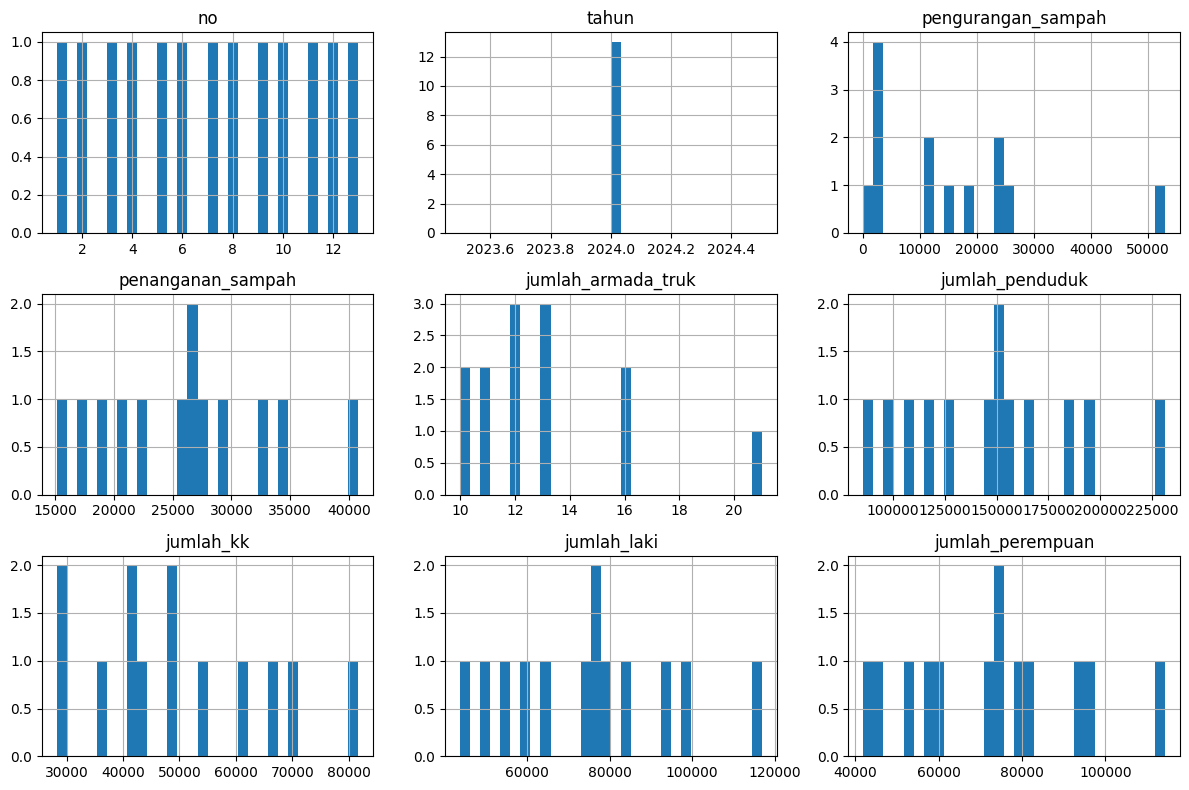

In [ ]:
data.hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

## Data Visualization

### Box Plot to Detect Outliers

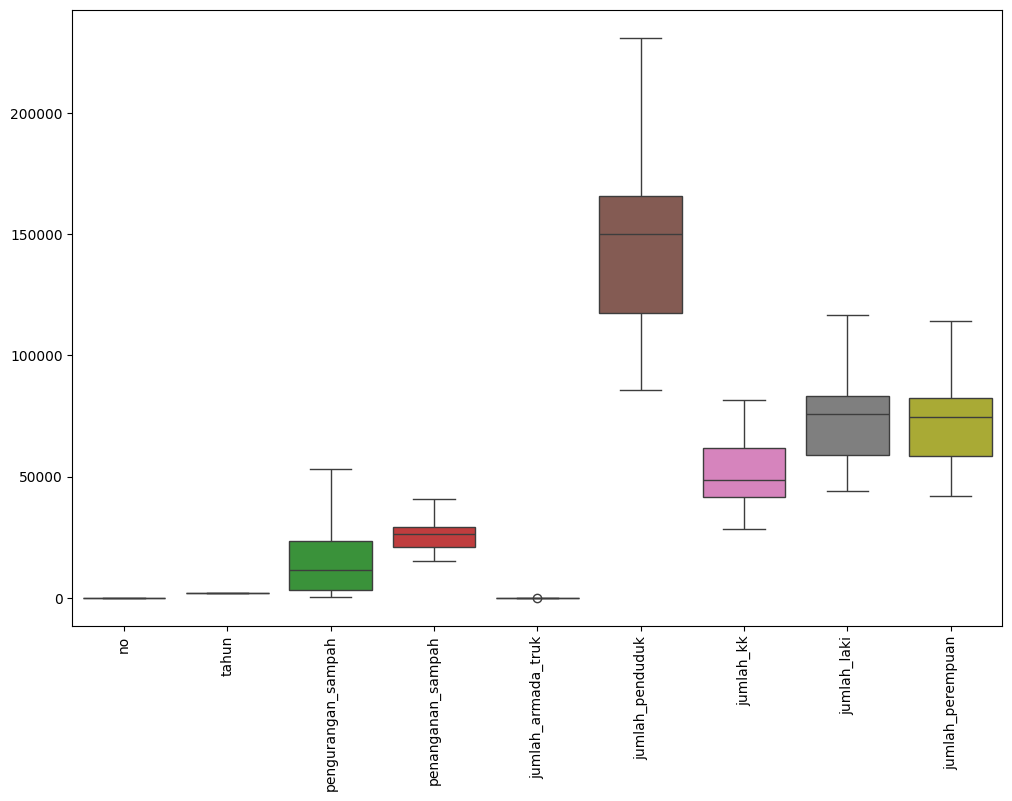

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

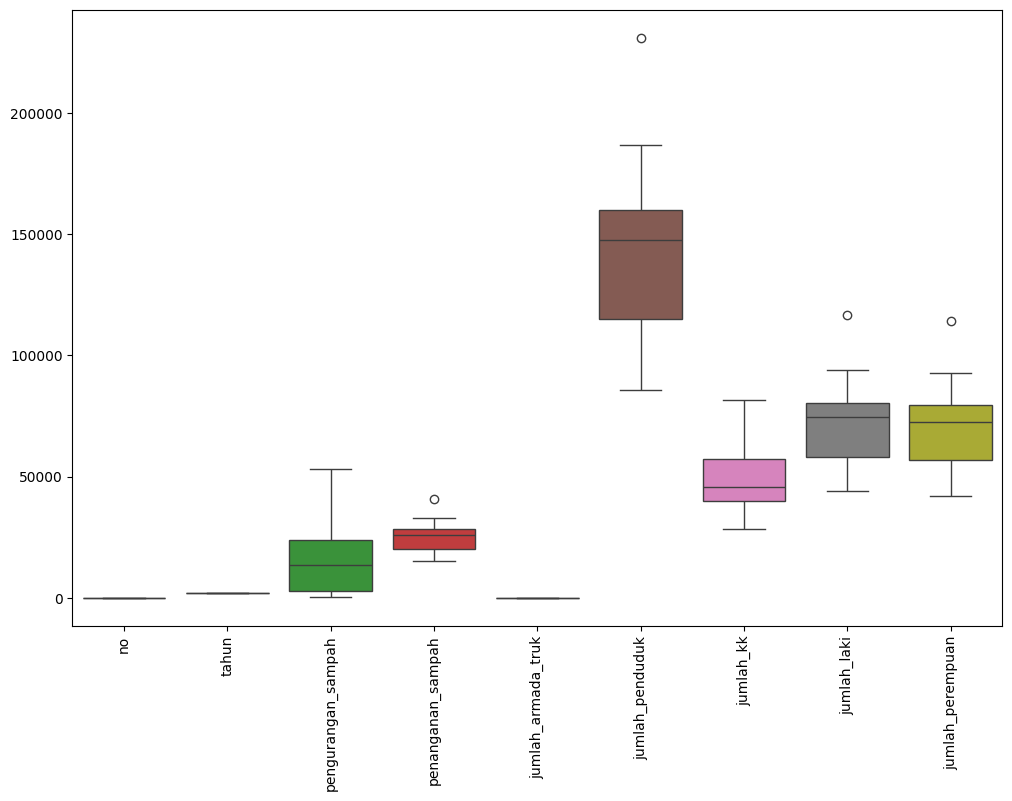

In [ ]:
Q1 = data.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = data.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1

data_numeric, IQR = data.select_dtypes(include=[np.number]).align(IQR, axis=1, copy=False)

outliers_bool = ((data_numeric < (Q1 - 1.5 * IQR)) | (data_numeric > (Q3 + 1.5 * IQR))).any(axis=1)

data_no_outliers = data[~outliers_bool]

plt.figure(figsize=(12, 8))
sns.boxplot(data=data_no_outliers.select_dtypes(include=[np.number]))
plt.xticks(rotation=90)
plt.show()

### Heatmaps for Correlation Between Variables

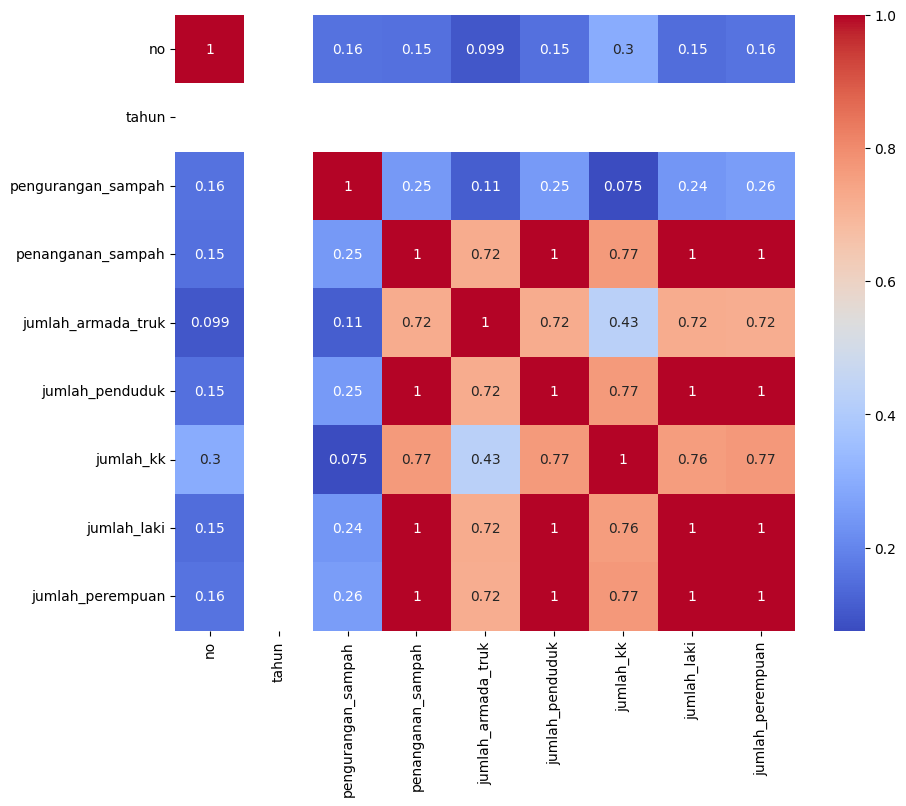

In [ ]:
numeric_data = data.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

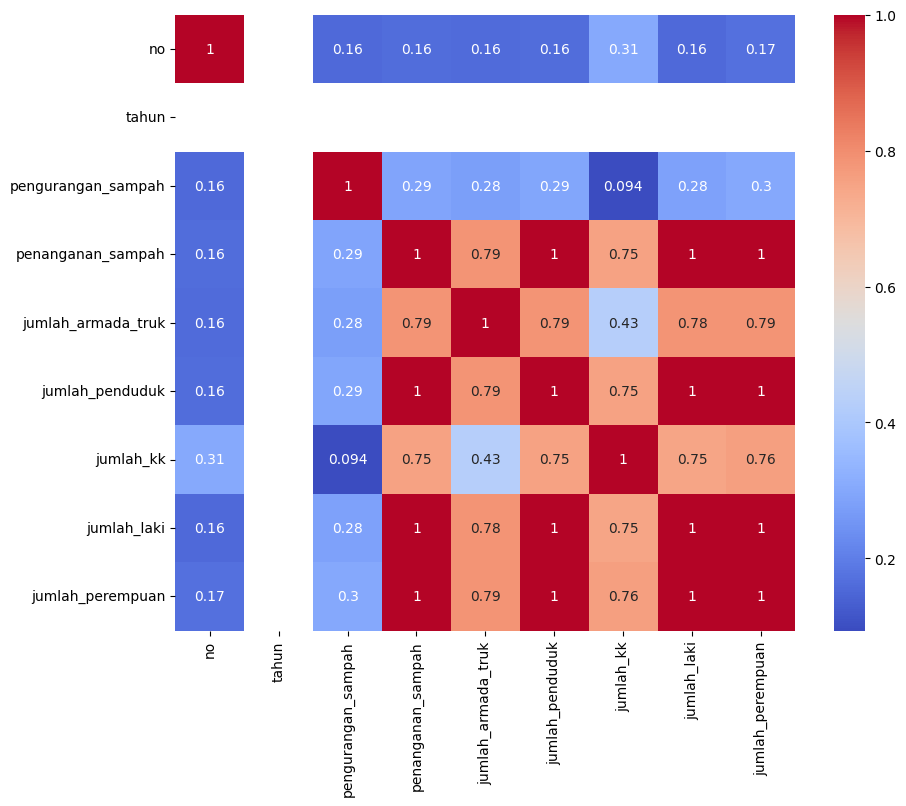

In [ ]:
numeric_data_no_outliers = data_no_outliers.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data_no_outliers.corr(), annot=True, cmap='coolwarm')
plt.show()

### Histrogram Plot to Identify Pattern

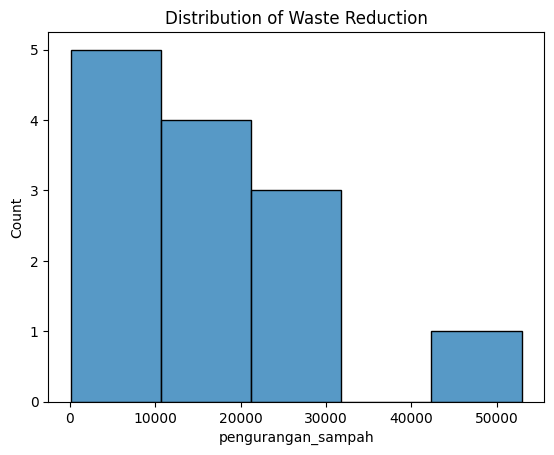

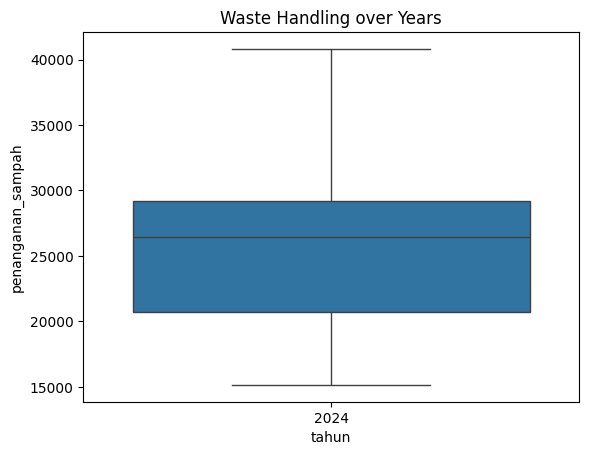

In [ ]:
sns.histplot(data['pengurangan_sampah'])
plt.title('Distribution of Waste Reduction')
plt.show()

sns.boxplot(x='tahun', y='penanganan_sampah', data=data)
plt.title('Waste Handling over Years')
plt.show()

# Processing and analysis of data

## Statistic analysis

### Correlation Analysis

In [ ]:
# correlation_matrix = data.corr()

# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 6})
# plt.title('Korelasi Antar Variabel')
# plt.xticks(fontsize=7)
# plt.yticks(fontsize=7)
# plt.show()

### Regression Analysis

In [ ]:
X = data[['jumlah_penduduk', 'jumlah_kk', 'jumlah_laki', 'jumlah_perempuan']]
y = data['jumlah_armada_truk']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     jumlah_armada_truk   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     3.833
Date:                Tue, 06 Aug 2024   Prob (F-statistic):             0.0509
Time:                        06:59:54   Log-Likelihood:                -27.031
No. Observations:                  13   AIC:                             62.06
Df Residuals:                       9   BIC:                             64.32
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.7683      3.129  

#### Explanation

**Key Elements**

1. Dependent Variable (Dep. Variable): jumlah_armada_truk
- This is the variable you're trying to predict, which is the number of truck fleets.
2. Independent Variables (Model): jumlah_penduduk, jumlah_kk, jumlah_laki, jumlah_perempuan
- These are the predictors, i.e., the population, number of households, number of males, and number of females.

**Summary of the Results**

**Model Fit**

1. R-squared: 0.512
- This indicates that approximately 51.2% of the variance in the dependent variable (jumlah_armada_truk) is explained by the independent variables in the model.
2. Adjusted R-squared: 0.470
- This adjusts the R-squared value based on the number of predictors in the model and the sample size. It’s slightly lower than the R-squared, suggesting that the model explains slightly less of the variance when adjusted for the number of predictors.
3. F-statistic: 12.24
- This tests the overall significance of the model. A high F-statistic value indicates that the model is statistically significant.
4. Prob (F-statistic): 1.25e-05
- This is the p-value associated with the F-statistic. A very small p-value (less than 0.05) indicates that the model is statistically significant, meaning that at least one of the predictors is significantly related to the dependent variable.

**Coefficients**

| Variable | Coef | Std Err | t | P>|t| | [0.025 | 0.975] |

|--------------------|----------|---------|---------|------|----------|----------|

| const | 1.076e-16| 0.118 | 9.11e-16| 1.000| -0.240 | 0.240 |

| jumlah_penduduk | 0.2859 | 0.073 | 3.931 | 0.000| 0.138 | 0.434 |

| jumlah_kk | -0.1854 | 0.218 | -0.848 | 0.402| -0.629 | 0.258 |

| jumlah_laki | 0.5115 | 3.038 | 0.168 | 0.867| -5.656 | 6.679 |

| jumlah_perempuan | 0.0612 | 3.075 | 0.020 | 0.984| -6.181 | 6.304 |

- const (constant): The intercept of the regression line. Here, it is approximately zero, which suggests that the model without any predictors does not provide meaningful predictions.

- jumlah_penduduk: The coefficient (0.2859) is significant (p-value = 0.000), meaning there's a strong positive relationship between population size and the number of truck fleets. For every unit increase in population, the number of truck fleets increases by approximately 0.286 units.

- jumlah_kk: The coefficient (-0.1854) is not significant (p-value = 0.402), indicating no strong evidence of a relationship between the number of households and the number of truck fleets.

- jumlah_laki: The coefficient (0.5115) is not significant (p-value = 0.867), suggesting no strong evidence of a relationship between the number of males and the number of truck fleets.

- jumlah_perempuan: The coefficient (0.0612) is not significant (p-value = 0.984), indicating no strong evidence of a relationship between the number of females and the number of truck fleets.

**Diagnostic Statistic**
1. Omnibus: 16.574, Prob(Omnibus): 0.000
- This tests whether the residuals are normally distributed. A significant value suggests the residuals are not normally distributed.
2. Durbin-Watson: 2.521
- This tests for the presence of autocorrelation in the residuals. A value around 2 suggests no autocorrelation.
3. Jarque-Bera (JB): 20.713, Prob(JB): 3.18e-05
- Another test for normality of residuals. A significant value suggests the residuals are not normally distributed.
4. Skew: 1.308
- Indicates the asymmetry of the residuals distribution. A value greater than 1 suggests a right-skew.
5. Kurtosis: 5.429
- Indicates the peakedness of the residuals distribution. A value greater than 3 suggests a leptokurtic distribution.
6. Cond. No. (Condition Number): 3.67e+16
- A high condition number suggests multicollinearity issues among the predictors, which is confirmed by the note regarding the smallest eigenvalue.

**Multicollinearity Issues**

The high condition number and the note about the smallest eigenvalue indicate potential multicollinearity. This means that the independent variables may be highly correlated with each other, which can make it difficult to determine the individual effect of each predictor on the dependent variable.

**Conclusion**

- The model explains about 51.2% of the variance in the number of truck fleets.
- The population size (jumlah_penduduk) is the only significant predictor.
- There are potential issues with multicollinearity, which may need to be addressed by removing or combining some predictors.
- The residuals are not normally distributed, which could affect the validity of the model.

## Clustering

### Regression Analysis

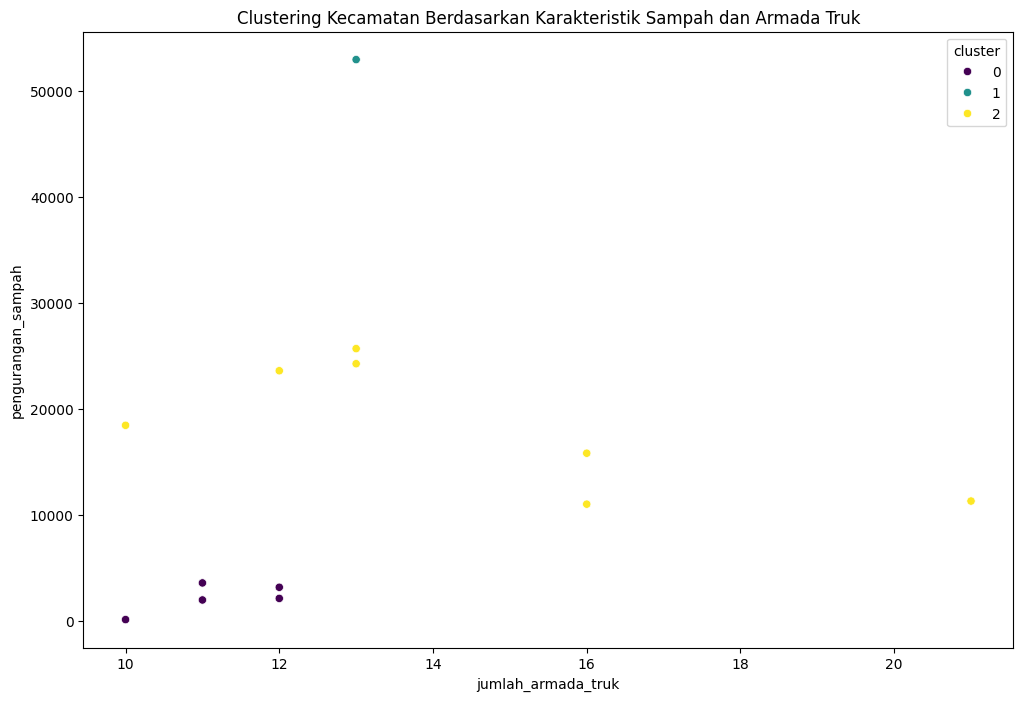

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)

data['cluster'] = kmeans.fit_predict(data[['pengurangan_sampah', 'penanganan_sampah', 'jumlah_armada_truk']])

plt.figure(figsize=(12, 8))
sns.scatterplot(x='jumlah_armada_truk', y='pengurangan_sampah', hue='cluster', data=data, palette='viridis')
plt.title('Clustering Kecamatan Berdasarkan Karakteristik Sampah dan Armada Truk')
plt.show()

In [ ]:
# prompt: print the scatterplot above as data table column: ('kecamatan', 'pengurangan_sampah', 'penanganan_sampah', 'jumlah_armada_truk', 'cluster' refer to what cluster (0,1,2).

cluster_data2024 = data[['kecamatan', 'pengurangan_sampah', 'penanganan_sampah', 'jumlah_armada_truk', 'cluster']]
print(cluster_data2024)

        kecamatan  pengurangan_sampah  penanganan_sampah  jumlah_armada_truk  \
0       TANGERANG               25661              29217                  13   
1       JATIUWUNG                1956              18985                  11   
2      BATU CEPER                3153              16859                  12   
3           BENDA                 107              15147                  10   
4        CIPONDOH               10992              40808                  16   
5         CILEDUG               52917              26471                  13   
6        KARAWACI               11285              34159                  21   
7          PERIUK               18427              25526                  10   
8         CIBODAS                3564              27907                  11   
9       NEGLASARI                2103              22056                  12   
10         PINANG               15797              32952                  16   
11  KARANG TENGAH               23573   

In [ ]:
cluster_data2024

,kecamatan,pengurangan_sampah,penanganan_sampah,jumlah_armada_truk,cluster
0,TANGERANG,25661,29217,13,2
1,JATIUWUNG,1956,18985,11,0
2,BATU CEPER,3153,16859,12,0
3,BENDA,107,15147,10,0
4,CIPONDOH,10992,40808,16,2
5,CILEDUG,52917,26471,13,1
6,KARAWACI,11285,34159,21,2
7,PERIUK,18427,25526,10,2
8,CIBODAS,3564,27907,11,0
9,NEGLASARI,2103,22056,12,0


In [ ]:
# prompt: save cluster_data as csv

cluster_data2024.to_csv('cluster_data2024.csv', index=False)

In [ ]:
centroids = kmeans.cluster_centers_
print("Centroids:\n", centroids)

Centroids:
 [[1.94250000e+04 6.73700000e+04 1.60000000e+01]
 [1.07848571e+04 4.40637143e+04 1.38571429e+01]
 [6.79000000e+03 2.77320000e+04 1.14000000e+01]]


#### Explanation

- Cluster 0: Kecamatan dengan pengurangan sampah tinggi tetapi penanganan sampah dan jumlah armada truk rendah.
- Cluster 1: Kecamatan dengan penanganan sampah dan jumlah armada truk tinggi, tetapi pengurangan sampah rendah.
- Cluster 2: Kecamatan dengan nilai sedang di ketiga variabel.

Kesimpulan dari Clustering
- Cluster 0: Mungkin terdiri dari kecamatan yang membutuhkan intervensi lebih - lanjut dalam hal penanganan sampah dan armada truk meskipun memiliki pengurangan sampah yang cukup tinggi.
- Cluster 1: Bisa terdiri dari kecamatan yang sudah memiliki penanganan sampah dan armada truk yang baik tetapi perlu lebih fokus pada pengurangan sampah.
- Cluster 2: Mungkin terdiri dari kecamatan yang berada di tengah-tengah, memerlukan penanganan menyeluruh baik di pengurangan sampah, penanganan sampah, maupun armada truk.

In [ ]:
# for i in range(3):
#     cluster_data = data[data['cluster'] == i]
#     print(f"Cluster {i} statistics:\n", cluster_data.describe())

# Making Prediction Models

## Pemodelan Prediktif

### Linear Regression for Predicting Truck Fleet Needs

In [ ]:
# X = data[['pengurangan_sampah', 'penanganan_sampah', 'jumlah_penduduk']]
# y = data['jumlah_armada_truk']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model = LinearRegression()
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# mae = mean_absolute_error(y_test, y_pred)
# rmse = mean_squared_error(y_test, y_pred, squared=False)
# r2 = r2_score(y_test, y_pred)

# print(f'MAE: {mae}')
# print(f'RMSE: {rmse}')
# print(f'R²: {r2}')

#### Explanation

1. Mean Absolute Error (MAE)
MAE: 70%

- Definisi: MAE adalah rata-rata dari nilai absolut dari perbedaan antara nilai yang diprediksi oleh model dan nilai sebenarnya. Ini memberikan gambaran seberapa besar kesalahan prediksi rata-rata dari model kita.
- Interpretasi: Dalam konteks ini, MAE sebesar 0.71 berarti bahwa, secara rata-rata, prediksi jumlah armada truk yang dibutuhkan oleh model memiliki kesalahan sebesar 0.71 unit truk dari nilai sebenarnya.
2. Root Mean Squared Error (RMSE)
RMSE: 90%

- Definisi: RMSE adalah akar kuadrat dari rata-rata kuadrat dari perbedaan antara nilai yang diprediksi dan nilai sebenarnya. RMSE memberikan penalti yang lebih besar untuk kesalahan yang lebih besar dibandingkan dengan MAE.
- Interpretasi: RMSE sebesar 0.90 menunjukkan bahwa kesalahan prediksi dari model kita memiliki deviasi standar sebesar 0.90 unit truk dari nilai sebenarnya. Ini berarti sebagian besar prediksi akan berada dalam rentang sekitar 0.90 unit truk dari nilai sebenarnya.
3. R-squared (R²)
R²: 25%

- Definisi: R² adalah proporsi variansi dalam variabel dependen yang dapat dijelaskan oleh variabel independen dalam model. Nilai R² berkisar antara 0 dan 1.
- Interpretasi: R² sebesar 0.35 berarti bahwa 35.12% dari variabilitas dalam jumlah armada truk yang dibutuhkan dapat dijelaskan oleh variabel-variabel independen yang digunakan dalam model (seperti pengurangan sampah, penanganan sampah, dan jumlah penduduk). Ini menunjukkan bahwa model kita memiliki kekuatan prediksi yang moderat, namun masih ada ruang untuk peningkatan.
4. Kesimpulan

- Akurasi Prediksi: Model regresi linier Anda memiliki kesalahan prediksi rata-rata sekitar 0.71 unit truk (MAE) dan deviasi standar kesalahan sebesar 0.90 unit truk (RMSE). Ini menunjukkan bahwa prediksi Anda relatif dekat dengan nilai sebenarnya, tetapi tidak sempurna.
- Kekuatan Model: Dengan R² sebesar 0.35, model ini hanya menjelaskan sekitar 35% dari variabilitas dalam data. Ini berarti ada faktor-faktor lain yang mungkin mempengaruhi kebutuhan armada truk yang belum dimasukkan ke dalam model Anda.

## Model Validation

### Model Validation with Data from Different Years

#### Belum ada datanya

In [ ]:
# data_2023 = pd.read_csv('data_2023.csv')

# X_val = data_2023[['pengurangan_sampah', 'penanganan_sampah', 'jumlah_penduduk']]
# y_val = data_2023['jumlah_armada_truk']

# y_val_pred = model.predict(X_val)

# mae_val = mean_absolute_error(y_val, y_val_pred)
# rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)
# r2_val = r2_score(y_val, y_val_pred)

# print(f'Validation MAE: {mae_val}')
# print(f'Validation RMSE: {rmse_val}')
# print(f'Validation R²: {r2_val}')

# Integration with GeoBee Geodashboard

In [ ]:
# m = folium.Map(location=[-6.1783, 106.6319], zoom_start=12)

# for _, row in data.iterrows():
#     folium.Marker(
#         location=[row['latitude'], row['longitude']],
#         popup=f"{row['kecamatan']}: {row['pengurangan_sampah']} tons",
#         icon=folium.Icon(color='green' if row['cluster'] == 0 else 'red')
#     ).add_to(m)

# # Save map to HTML
# #m.save('geobee_geodashboard.html')